<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/ds6_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install kagglehub

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


1. 각 컬럼별 타입(Dtype)분석 결과
- InvoiceNo(object): 문자열 형태의 거래번호
- StockCode(object): 상품번호
- Description(object): 상품명,일부 결측치 있음( 854 결측치)
- Quantity(int64): 수량(음수는 반품/취소건 -> 반드시 제거 필요)
- **InvoiceData(object) : 문자열로 되어었음 --> datetime 형으로 변환필요**
- UnitPrice (float64) : 단가 .0 이하 값 존재시 이상치로 간주 가능
- CustomerID(float64) : 고객ID, 결측값이 135,260( 25%) -> 필터링 or 대체 필요
- Country(object):  고객 국가(약 37개국 포함됨)

 ### 데이터 전처리

1.   결측치 확인
*   CustomerID
*   Description 일부 누락되었음

2.  데이터 타입 변환 필요

*   InvoiceData pd.to_datetime()으로 변환

3.   이상치 처리 필요

*   Quantity <= 0 또는 UnitPrice < 0= 은 비정상 거래이므로 필터링 필요

In [9]:
# CustomerID 결측치 제거
df = df.dropna(subset = ['CustomerID'])
# CustomerID를 정수형으로 변환
df['CustomerID'] = df['CustomerID'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [12]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [13]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  int64         
 7   Country       406829 non-null  object        
 8   TotalPrice    406829 non-null  float64       
 9   DayOfWeek     406829 non-null  int32         
 10  InvoiceMonth  406829 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(4)
memory usage: 34.1+ MB


In [17]:
df[["TotalPrice", "Quantity", "UnitPrice"]].head()

,TotalPrice,Quantity,UnitPrice
0,15.30,6,2.55
1,20.34,6,3.39
2,22.00,8,2.75
3,20.34,6,3.39
4,20.34,6,3.39


In [18]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [14]:
# 데이터 확인(datetime + int 칼럼 확인)
df[['InvoiceDate', 'DayOfWeek', 'InvoiceMonth']].info()
# 앞부분 5개 행 미리보기
df[['InvoiceDate', 'DayOfWeek', 'InvoiceMonth']].head()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceDate   406829 non-null  datetime64[ns]
 1   DayOfWeek     406829 non-null  int32         
 2   InvoiceMonth  406829 non-null  int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 9.3 MB


,InvoiceDate,DayOfWeek,InvoiceMonth
0,2010-12-01 08:26:00,2,12
1,2010-12-01 08:26:00,2,12
2,2010-12-01 08:26:00,2,12
3,2010-12-01 08:26:00,2,12
4,2010-12-01 08:26:00,2,12


전체 데이터의 EDA(Exploratory Data Analysis)

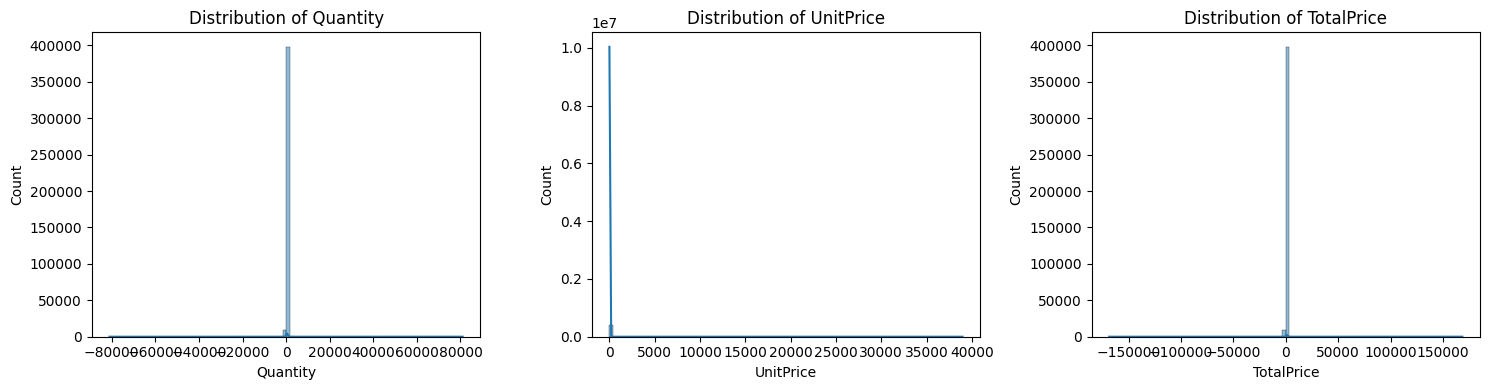

In [19]:
# 수치형 변수의 분포 파악 (Histogram)

numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

plt.figure(figsize = (15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col],bins = 100, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

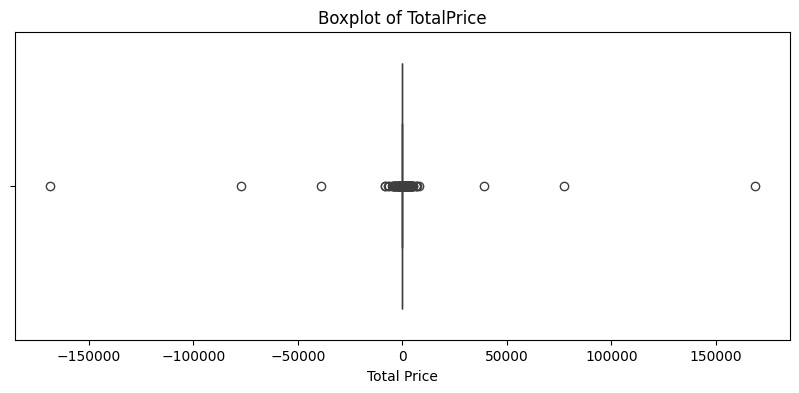

In [25]:
# 이상치 탐색
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['TotalPrice'])
plt.title('Boxplot of TotalPrice')
plt.xlabel('Total Price')

plt.show()

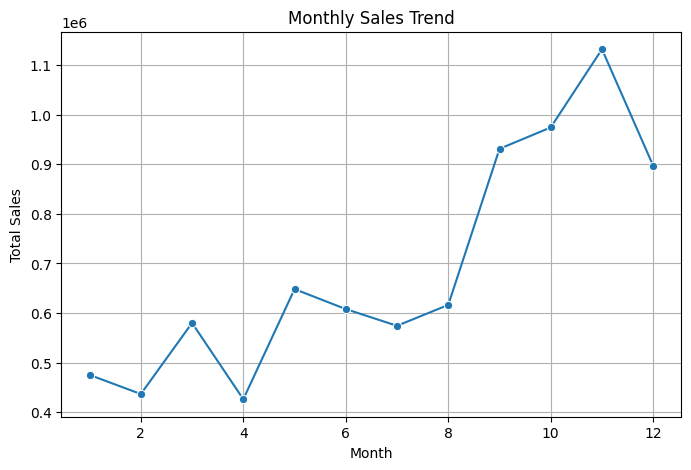

In [26]:
# 월별 매출 추이(Line plot)
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

/tmp/ipython-input-3706551594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


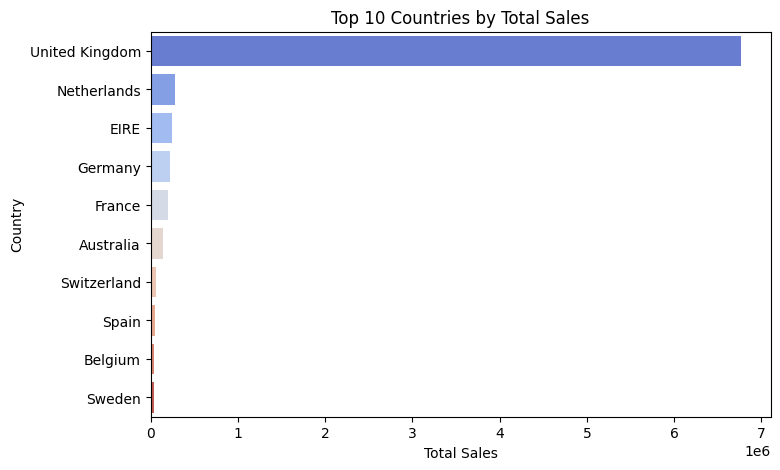

In [27]:
# 국가별 매출 상위 10개(Bar Plot)
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


/tmp/ipython-input-3325616894.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='TotalPrice', data=df, estimator='sum', ci=None, palette='viridis')
/tmp/ipython-input-3325616894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='TotalPrice', data=df, estimator='sum', ci=None, palette='viridis')


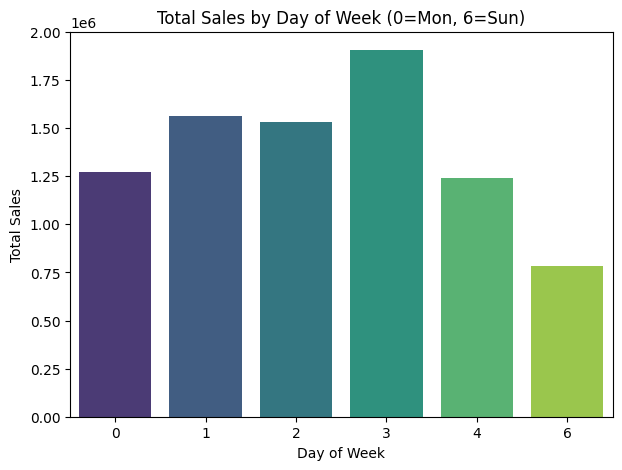

In [21]:
# 요일별 거래 패턴(Bar Plot)
plt.figure(figsize=(7,5))
sns.barplot(x='DayOfWeek', y='TotalPrice', data=df, estimator='sum', ci=None, palette='viridis')
plt.title('Total Sales by Day of Week (0=Mon, 6=Sun)')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

In [22]:
df['DayOfWeek'].value_counts().sort_index()

,count
DayOfWeek,
0,66382
1,68110
2,70599
3,82374
4,56127
6,63237


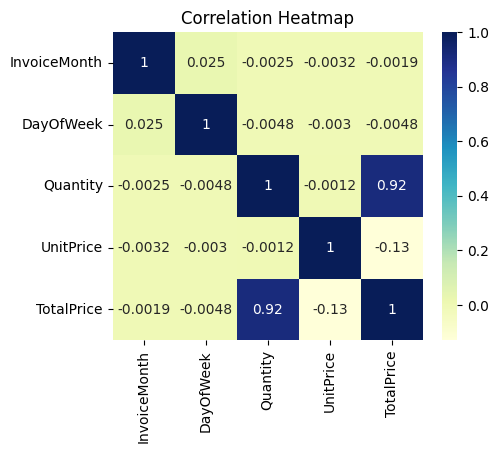

In [37]:
# 변수 간 상관관계 (Heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(df[['InvoiceMonth', 'DayOfWeek', 'Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [39]:
# 데이터셋에서 무작위로 1000개의 표본을 추출
sample = df['TotalPrice'].sample(n=1000, random_state=42)

sample_mean = sample.mean()
sample_std = sample.std()

print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")

표본 평균: 19.77
표본 표준편차: 37.24


In [40]:
# 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교
# 모집단(전체 데이터)에서 TotalPrice의 평균과 표준편차 계산
population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()

print(f"모집단 평균: {population_mean:.2f}")
print(f"모집단 표준편차: {population_std:.2f}")


모집단 평균: 20.40
모집단 표준편차: 427.59


| 개념                  | 의미                   | 예시                            |
| ------------------- | -------------------- | ----------------------------- |
| **모집단(population)** | 전체 데이터               | Online Retail 전체 거래 (약 40만 건) |
| **표본(sample)**      | 모집단에서 임의로 추출한 일부 데이터 | 1000건의 거래 데이터                 |
| **모평균(μ)**          | 모집단의 평균              | 전체 거래의 평균 주문금액                |
| **표본평균(𝑥̄)**       | 표본의 평균               | 추출된 1000건의 평균 주문금액            |
| **표본표준편차(s)**       | 표본의 데이터 흩어짐 정도       | 1000건의 TotalPrice 분산 정도       |

“표본 크기가 충분히 크면 (보통 n ≥ 30),
표본평균의 분포는 모집단의 모양과 관계없이 정규분포를 따른다.”

즉, 전체 데이터(TotalPrice)는 한쪽으로 치우친 분포(양의 왜도)를 가지더라도,

여러 번 표본을 추출해 평균을 구하면, 그 평균값들의 분포는 종 모양(정규분포) 이 된다.


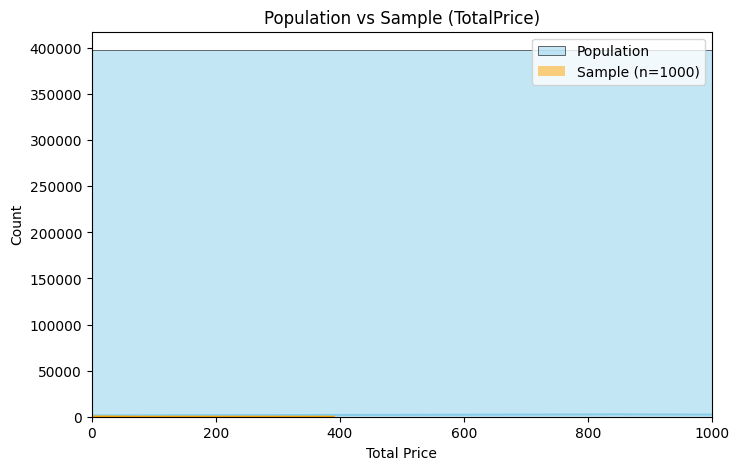

In [41]:
# 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교
# 시각화
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPrice'], bins=100, color='skyblue', label='Population', kde=True)
sns.histplot(sample, bins=50, color='orange', label='Sample (n=1000)', kde=True)
plt.xlim(0, 1000)
plt.title('Population vs Sample (TotalPrice)')
plt.xlabel('Total Price')
plt.legend()
plt.show()


모집단 평균 ≈ 표본 평균
→ 무작위 추출된 표본의 평균은 전체 평균과 비슷해야 함.
→ 즉, 표본은 모집단을 “대표”할 수 있다.

표본 표준편차 < 모집단 표준편차
→ 표본은 일부 데이터만 포함하므로 변동성이 약간 줄어듦.
→ 하지만 표본 수가 많을수록 모집단의 형태를 점점 닮아감.

시각화 결과: 전체 데이터(Population)와 표본(Sample)의 분포는 비슷하지만,
극단값(이상치) 때문에 시각적으로 비교가 불가능함


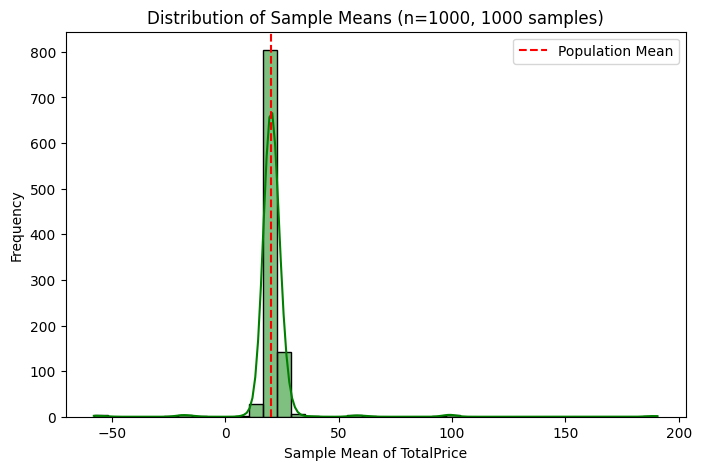

In [43]:
# 중심극한정리 실험 (표본평균의 분포 관찰)
sample_means = []

# 표본을 1000번 반복 추출
for i in range(1000):
    sample = df['TotalPrice'].sample(n=1000, replace=True)
    sample_means.append(sample.mean())

# 표본평균의 분포 시각화
plt.figure(figsize=(8,5))
sns.histplot(sample_means, bins=40, kde=True, color='green')
plt.title('Distribution of Sample Means (n=1000, 1000 samples)')
plt.xlabel('Sample Mean of TotalPrice')
plt.ylabel('Frequency')
plt.axvline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

### 나의 해석
- 모집단 분포가 비대칭이어도, 표본 크기가 충분히 크면 (보통 n ≥ 30),> 표본평균들의 분포는 정규분포를 따른다는 가정하에 표본의 평균 19.77은 전체 모집단 평균 20.40과 비슷하다고 할 수 있음.
| 20.40-19.11 | = 0.63
표준오차(SE)를 비교 z = 0.63/ 13.52
- 모집단의 표준편차(427.59)는 매우 크지만, 표본평균이 모집단 평균에서 0.05표준편차 떨어진 곳에 분포하므로 평균의 추정이 안정적이라고 할 수 있음
- 표본평균은 모집단평균과 통계적으로 유의한 차이가 없다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

### 1.  독립표본 t-검정(independent samples t-test)
주문이 가장 많은 두 국가 간에
평균 주문 금액(TotalPrice)에 통계적으로 유의한 차이가 있는가?


In [44]:
# 주문 수가 많은 상위 두 국가 확인
top_countries = df['Country'].value_counts().head(2)
print(top_countries)


Country
United Kingdom    361878
Germany             9495
Name: count, dtype: int64


In [45]:
# 상위 2개 국가 이름 추출
country1, country2 = top_countries.index[0], top_countries.index[1]

# 각 국가별 TotalPrice 데이터 추출
group1 = df[df['Country'] == country1]['TotalPrice']
group2 = df[df['Country'] == country2]['TotalPrice']

print(f"{country1} 데이터 개수:", len(group1))
print(f"{country2} 데이터 개수:", len(group2))


United Kingdom 데이터 개수: 361878
Germany 데이터 개수: 9495


In [46]:
# 이상치 제거 (99퍼센타일 기준)
group1 = group1[group1 < group1.quantile(0.99)]
group2 = group2[group2 < group2.quantile(0.99)]


In [47]:
# 두 집단의 평균 비교 및 독립표본 t-검정 수행

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # 등분산 가정 X (Welch’s t-test)
print(f"t-통계량: {t_stat:.3f}, p-값: {p_value:.5f}")
print(f"{country1} 평균: {group1.mean():.2f}, {country2} 평균: {group2.mean():.2f}")


t-통계량: -12.260, p-값: 0.00000
United Kingdom 평균: 13.56, Germany 평균: 20.75


In [48]:
# 각 국가의 표준편차 계산
uk_std = group1.std()
ger_std = group2.std()

print(f"United Kingdom 표준편차: {uk_std:.2f}")
print(f"Germany 표준편차: {ger_std:.2f}")

United Kingdom 표준편차: 318.70
Germany 표준편차: 23.91


- 귀무가설(H₀ ): 두 국가의 평균 구매금액은 같다.
- 대립가설(H₁): 두 국가의 평균 구매금액은 같지 않다
 일 때,
-  두 국가간 평균의 표준오차는 12.26로 나타났으며, 유의수준 0.05 에서 영국과 독일의 TotalPrice은 통계적으로 유의한 차이( t = -12.260, p < 0.001)가 나타났다.
- 1종오류: 실제로 영국과 독일의 실제 평균이 같은데, 이를 기각할 확률은 0.00미만이다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [49]:
# 주중/주말 구분 컬럼 생성
# 주중(0~4), 주말(5~6) 구분
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 확인
df[['InvoiceDate', 'DayOfWeek', 'IsWeekend']].head()

,InvoiceDate,DayOfWeek,IsWeekend
0,2010-12-01 08:26:00,2,Weekday
1,2010-12-01 08:26:00,2,Weekday
2,2010-12-01 08:26:00,2,Weekday
3,2010-12-01 08:26:00,2,Weekday
4,2010-12-01 08:26:00,2,Weekday


In [50]:
# 그룹별 기술통계량 계산
stats = df.groupby('IsWeekend')['UnitPrice'].agg(
    Mean='mean',
    Median='median',
    Std='std',
    Variance='var',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

print(stats)


               Mean  Median        Std     Variance    Q1    Q3
IsWeekend                                                      
Weekday    3.580847    1.95  75.404850  5685.891372  1.25  3.75
Weekend    2.806417    1.69   3.955275    15.644197  1.25  3.75


/tmp/ipython-input-3795111502.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsWeekend', y='UnitPrice', data=df, palette='Set2', showfliers=False)


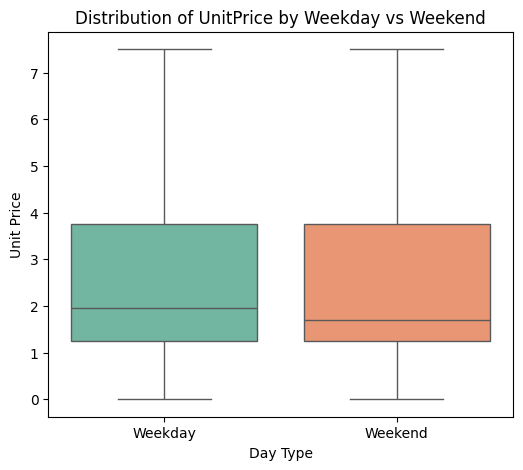

In [51]:
# 상자수염그림(Boxplot)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.boxplot(x='IsWeekend', y='UnitPrice', data=df, palette='Set2', showfliers=False)
plt.title('Distribution of UnitPrice by Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Unit Price')
plt.show()


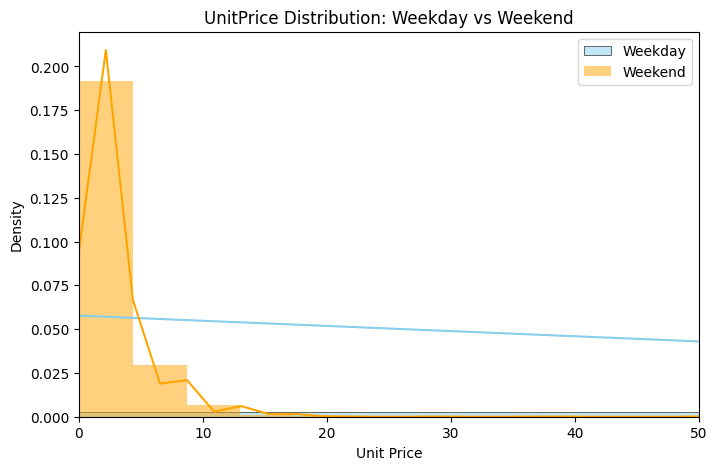

In [52]:
# 히스토그램(겹쳐 보기)

plt.figure(figsize=(8,5))
sns.histplot(df[df['IsWeekend']=='Weekday']['UnitPrice'], bins=100, color='skyblue', label='Weekday', kde=True, stat='density')
sns.histplot(df[df['IsWeekend']=='Weekend']['UnitPrice'], bins=100, color='orange', label='Weekend', kde=True, stat='density')
plt.xlim(0, 50)  # 극단값 제외
plt.title('UnitPrice Distribution: Weekday vs Weekend')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.legend()
plt.show()


#  결과
- 평균(Mean)에서의 주중은 3.58, 주말이 2.80으로, 주중의 평균이 높음(0.78).
- 중앙값(Median)에서 주중은 1.95, 주말에는 1.69로 나타났음.
- 표준편차 및 분산을 살펴보면 주중의 표준편차(75.40)가 주말(3.96)보다 크게 나타났음.
→ 1사분위(Q1)와 3사분위(Q3):두 그룹 모두 (1.25 ~ 3.75) 범위로 거의 동일하게 나타났음.
- 히스토그램: 두 분포 모두 0~5 구간에 데이터가 몰려 있음 (오른쪽 꼬리 긴 형태 → 우측 편향).
- Weekday의 곡선은 천천히 감소(완만한 꼬리),
Weekend는 Weekday보다 더 급격히 하락함


# 해석
1. 시각화를 통한 데이터 분포
- Boxplot을 살펴보면, 상자 높이(=IQR, 사분위 범위)는 비슷하나, Weekday의 중앙값이 Weekend 보다 높은 위치에 있으므로, 주중 거래의 UnitPrice가 주말보다 높다고 할 수 있음
- 주말보다 주중에 고가 거래가 더 많이 나타나고 있음.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

### 목표:
 1. 상품 단가(UnitPrice), 판매 국가(Country), 판매 요일(DayOfWeek), 판매 월(InvoiceMonth)이
판매 수량(Quantity)에 어떤 영향을 미치는지 분석한다.



In [53]:
# 데이터 전처리
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 필요한 변수만 선택
data = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# ① 결측치 제거
data = data.dropna()

# ② 이상치 제거 (수량이 비정상적으로 큰 값 제거)
data = data[data['Quantity'] < data['Quantity'].quantile(0.99)]
data = data[data['UnitPrice'] < data['UnitPrice'].quantile(0.99)]

# ③ Country(범주형)를 숫자형으로 변환
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

# 확인
print(data.describe())


            Quantity      UnitPrice        Country      DayOfWeek  \
count  398230.000000  398230.000000  398230.000000  398230.000000   
mean        8.845411       2.750214      32.926090       2.612546   
std       175.617384       2.563810       6.595672       1.926745   
min    -80995.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.250000      35.000000       1.000000   
50%         5.000000       1.950000      35.000000       2.000000   
75%        12.000000       3.750000      35.000000       4.000000   
max       117.000000      14.960000      36.000000       6.000000   

        InvoiceMonth  
count  398230.000000  
mean        7.610537  
std         3.419544  
min         1.000000  
25%         5.000000  
50%         8.000000  
75%        11.000000  
max        12.000000  


In [54]:
# 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 독립변수(X), 종속변수(y) 지정
X = data[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]
y = data['Quantity']

# 학습용 / 검증용 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 및 절편
print("절편 (Intercept):", model.intercept_)
coef = pd.DataFrame(model.coef_, X.columns, columns=['회귀계수'])
print(coef)

# 예측 및 결정계수
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("결정계수 (R²):", round(r2, 4))


절편 (Intercept): 21.45702190979282
                  회귀계수
UnitPrice    -1.285511
Country      -0.250465
DayOfWeek    -0.255069
InvoiceMonth -0.002060
결정계수 (R²): 0.0002


회귀식: Quantity^​=21.457−1.286(UnitPrice)-0.250(Country)-0.255(DayOfWeek)−0.002(InvoiceMonth)
- 상품단가(UnitPrice)는 판매 수량(Quantity)에 부적(-)의 유의한 영향을 미쳤다. 이는 가격이 높을수록 판매량이 줄어드는 일반적인 수요 관계로 해석할 수 있다.
- Country, DayOfWeek, InvoiceMonth도 부적(-)의  유의한  영향을 미쳤다.
그러나,
- 결정계수(R 스퀘어)가 0.0002 로 나타나 본 모델은 본 데이터의 판매량 변동을 설명하기에는 부족하다고 할 수 있다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [66]:
# 필요한 데이터를 정리하고 결측치와 이상치를 제거
data = df.copy()

# 유효한 거래만 남기기 (단가>0, 수량≠0, 날짜 존재)
data = data[(data['UnitPrice'] > 0) & (data['Quantity'] != 0)].dropna(subset=['InvoiceDate','Country','UnitPrice','Quantity'])

# 레이블 생성: 반품 1, 정상 0
is_return_c = data['InvoiceNo'].astype(str).str.startswith('C', na=False)
is_return_q = data['Quantity'] < 0
data['IsReturn'] = ((is_return_c) | (is_return_q)).astype(int)

# 학습에 사용할 안전한 수량 특징 (부호 제거)
data['AbsQty'] = data['Quantity'].abs()

# 필요 컬럼만
use_cols = ['IsReturn','UnitPrice','AbsQty','DayOfWeek','InvoiceMonth','Country']
data = data[use_cols].dropna()

print(data['IsReturn'].value_counts(normalize=True).round(4))

IsReturn
0    0.9781
1    0.0219
Name: proportion, dtype: float64


반품 비율: 약 2.2% → 심각한 불균형 데이터 상태를 확인하였

In [67]:
from sklearn.model_selection import train_test_split

X = data[['UnitPrice', 'AbsQty', 'DayOfWeek', 'InvoiceMonth', 'Country']]
y = data['IsReturn']

# 클래스 불균형 고려 → stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print('Train size:', X_train.shape)
print('Test size:', X_test.shape)
print('반품 비율(Train):', y_train.mean().round(4))
print('반품 비율(Test):', y_test.mean().round(4))


Train size: (325431, 5)
Test size: (81358, 5)
반품 비율(Train): 0.0219
반품 비율(Test): 0.0219


In [68]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

num_cols = ['UnitPrice', 'AbsQty', 'DayOfWeek', 'InvoiceMonth']
cat_cols = ['Country']

# 수치형: 표준화 / 범주형: 원-핫 인코딩
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# 클래스 불균형 고려 → class_weight='balanced'
logit = LogisticRegression(max_iter=300, class_weight='balanced', n_jobs=-1, solver='lbfgs')

# 파이프라인 구성
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', logit)
])

# 모델 학습
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['UnitPrice', 'AbsQty',
                                                   'DayOfWeek',
                                                   'InvoiceMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=300,
                                    n_jobs=-1))])

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# 예측
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

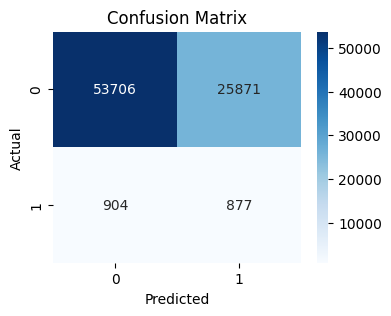

In [71]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

In [77]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, classification_report
)

print(" Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 주요 지표 직접 계산
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"정밀도(Precision): {precision:.4f}")
print(f"재현율(Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {auc:.4f}")


 Classification Report:
              precision    recall  f1-score   support

           0     0.9834    0.6749    0.8005     79577
           1     0.0328    0.4924    0.0615      1781

    accuracy                         0.6709     81358
   macro avg     0.5081    0.5837    0.4310     81358
weighted avg     0.9626    0.6709    0.7843     81358

정밀도(Precision): 0.0328
재현율(Recall): 0.4924
F1-score: 0.0615
ROC-AUC: 0.6359


### 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가결과
- 클래스 1에 대한 정밀도(Precision)는 0.03으로 반품이라고 예측한 것 중 실제 반품은 3%.
- 클래스 1에 대한 재현율(Recall)은 0.49로 실제 반품의 약 50%정도는 확인하였음
- 클래스 1에 대한 F1-score는 0.06로 정밀도와 재현율의 불균형상태
- 클래스 1에 대한 ROC-AUC는 0.78로 반품과 정상 거래를 구분하는 잠재적 능력을 확인되었음

# 그 외, 모델의 성능을 더 높일 수 있는 방안 마련하기

- LightGBM / XGBoost와 임계값(Threshold) 조정



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             precision_score, recall_score, f1_score, RocCurveDisplay)


In [79]:
# 1) 입력/정답
X = data[['UnitPrice','AbsQty','DayOfWeek','InvoiceMonth','Country']]
y = data['IsReturn']

# 2) 분할 (클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) 전처리
num_cols = ['UnitPrice','AbsQty','DayOfWeek','InvoiceMonth']
cat_cols = ['Country']
preprocess = ColumnTransformer(
    [('num', StandardScaler(), num_cols),
     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)]
)

# 4) 불균형 보정 가중치
pos = y_train.sum()
neg = (y_train==0).sum()
scale_pos_weight = neg / max(pos, 1)
scale_pos_weight

np.float64(44.68093767546322)

In [80]:
# LightGBM 모델
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=63,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,  # 🔸불균형 보정
    random_state=42
)

pipe_lgbm = Pipeline([
    ('prep', preprocess),
    ('model', lgbm)
])

pipe_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lgbm.predict(X_test)
y_prob_lgbm = pipe_lgbm.predict_proba(X_test)[:,1]

print("=== LightGBM @0.50 ===")
print(classification_report(y_test, y_pred_lgbm, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lgbm).round(4))


[LightGBM] [Info] Number of positive: 7124, number of negative: 318307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 325431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021891 -> initscore=-3.799547
[LightGBM] [Info] Start training from score -3.799547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM @0.50 ===
              precision    recall  f1-score   support

           0     0.9901    0.7952    0.8820     79577
           1     0.0657    0.6435    0.1192      1781

    accuracy                         0.7919     81358
   macro avg     0.5279    0.7193    0.5006     81358
weighted avg     0.9698    0.7919    0.8653     81358

ROC-AUC: 0.7914


In [81]:
# XGBoost 모델
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method='hist',      # GPU면 'gpu_hist' 가능
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  # 🔸불균형 보정
    eval_metric='logloss',
    random_state=42
)

pipe_xgb = Pipeline([
    ('prep', preprocess),
    ('model', xgb)
])

pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)
y_prob_xgb = pipe_xgb.predict_proba(X_test)[:,1]

print("=== XGBoost @0.50 ===")
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb).round(4))


=== XGBoost @0.50 ===
              precision    recall  f1-score   support

           0     0.9902    0.7760    0.8701     79577
           1     0.0616    0.6569    0.1126      1781

    accuracy                         0.7734     81358
   macro avg     0.5259    0.7165    0.4914     81358
weighted avg     0.9699    0.7734    0.8535     81358

ROC-AUC: 0.792


결과:
- LightGBM 모델 수행 결과
 로지스틱 회귀 대비 재현율(Recall)이 약 15%p 상승하였음
→ 반품 거래를 더 잘 탐지하게 됨.
하지만 여전히 Precision(정밀도) 가 낮음 → 정상 거래를 반품으로 잘못 분류하는 경우 많음.
ROC-AUC가 0.79로 상승 → 모델이 전체적으로 두 클래스를 더 잘 구분함.


- XGBoost를 수행한 결과
LightGBM보다 Recall이 약 5%p 높음
→ “실제 반품을 더 많이 찾아냄”.
그러나 Precision은 여전히 낮아서 오탐률은 그대로.
ROC-AUC 0.792 → 가장 높은 분류 성능으로 평가할 수 있음